In [2]:
#!/usr/bin/python
#dbr 01/22/2025
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("ticks")

#for mem
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
threshhold_name=''

#df=pd.read_csv('data/wideout-post1yr'+threshhold_name+'.csv'); tname = 'time_ART_mo'

df=pd.read_csv('data/clean1-out.csv'); tname = 'ART_mo'

In [4]:
df.head()

,Unnamed: 0,master_ptid,enrollcohort,infsex,haart_start_sregimen,ART_mo,age_yr,vload,cd4count,total_hivdna_persist2020,...,tot_tcells_persist2020,cens_vl,cens_intact,intact_corrected,short_id,co,log10VL,log10tot,log10int,log10def
0,4,311000119,0: OPH03,Female,3TC;AZT;NVP,1.380822,0.523288,12435.0,NaN,2982.4739,...,301640.96,0,0,1233.73770,1,OPH,4.094646,3.474577,3.091223,3.242724
1,7,311000119,0: OPH03,Female,3TC;AZT;NVP,3.320548,0.684932,540.0,NaN,NaN,...,NaN,0,0,NaN,1,OPH,2.732394,NaN,NaN,NaN
2,10,311000119,0: OPH03,Female,3TC;AZT;NVP,5.523288,0.868493,430.0,1741.0,1433.6752,...,167321.39,0,0,496.25262,1,OPH,2.633468,3.156451,2.695703,2.971935
3,13,311000119,0: OPH03,Female,3TC;AZT;NVP,8.284932,1.098630,435.0,NaN,NaN,...,NaN,0,0,NaN,1,OPH,2.638489,NaN,NaN,NaN
4,19,311000119,0: OPH03,Female,3TC;AZT;NVP,13.873973,1.564384,465.0,NaN,NaN,...,NaN,0,0,NaN,1,OPH,2.667453,NaN,NaN,NaN


In [5]:
outl=[]

for s in df['short_id'].unique():
    tdf=df[df['short_id']==s]

    #find the last intact measurement
    tI = tdf[[tname,'log10int']].dropna()
    
    if len(tI)>0:
        finalt = tI[tname].values[-1]
    
        tdf2 = tdf[tdf[tname]<=finalt]
        
        AUC = np.trapz(tdf2['log10VL'])
        #AUC = np.trapz(tdf2['log10VL'])/finalt
        
        finalI = tdf2['log10int'].iloc[-1]
        finalD = tdf2['log10def'].iloc[-1]
        
        outl.append([s,AUC,finalI,finalD,finalt])
        

outdf = pd.DataFrame(outl,columns=['sid','AUC','finalIntlog10','finalDeflog10','finalT'])

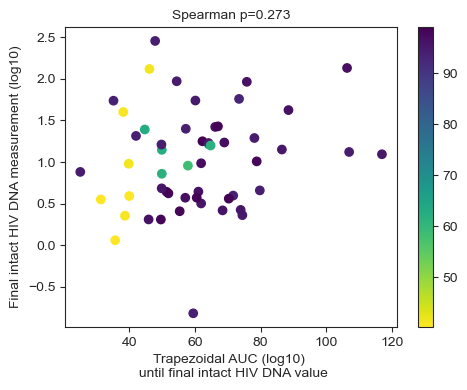

In [6]:
outdf = outdf[outdf['finalT']>40]

plt.figure(figsize=(5,4))
plt.scatter(outdf['AUC'],outdf['finalIntlog10'],c=outdf['finalT'],cmap='viridis_r')
plt.colorbar()

plt.xlabel('Trapezoidal AUC (log10) \n until final intact HIV DNA value')
plt.ylabel('Final intact HIV DNA measurement (log10)')

plt.title('Spearman p='+str(np.round(st.spearmanr(outdf['AUC'],outdf['finalIntlog10'])[1],3)),fontsize=10)

plt.tight_layout()
plt.savefig('figures/S4auccheck.png',dpi=600)

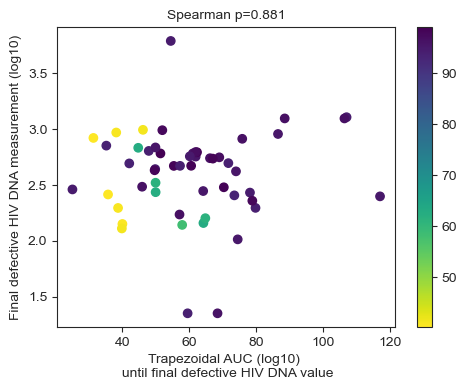

In [7]:
outdf = outdf[outdf['finalT']>40]

plt.figure(figsize=(5,4))
plt.scatter(outdf['AUC'],outdf['finalDeflog10'],c=outdf['finalT'],cmap='viridis_r')
plt.colorbar()

plt.xlabel('Trapezoidal AUC (log10) \n until final defective HIV DNA value')
plt.ylabel('Final defective HIV DNA measurement (log10)')

plt.title('Spearman p='+str(np.round(st.spearmanr(outdf['AUC'],outdf['finalDeflog10'])[1],3)),fontsize=10)

plt.tight_layout()
plt.savefig('figures/S4auccheckDef.png',dpi=600)